# Pump-probe runs

In [2]:
import os
import logging
import importlib

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import extra_data as ed
import extra_geom as eg

import toolbox_scs as tb
import toolbox_scs.detectors as tbdet

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

plt.rcParams['font.family'] = 'Arial'
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
xr.set_options(display_style='text')

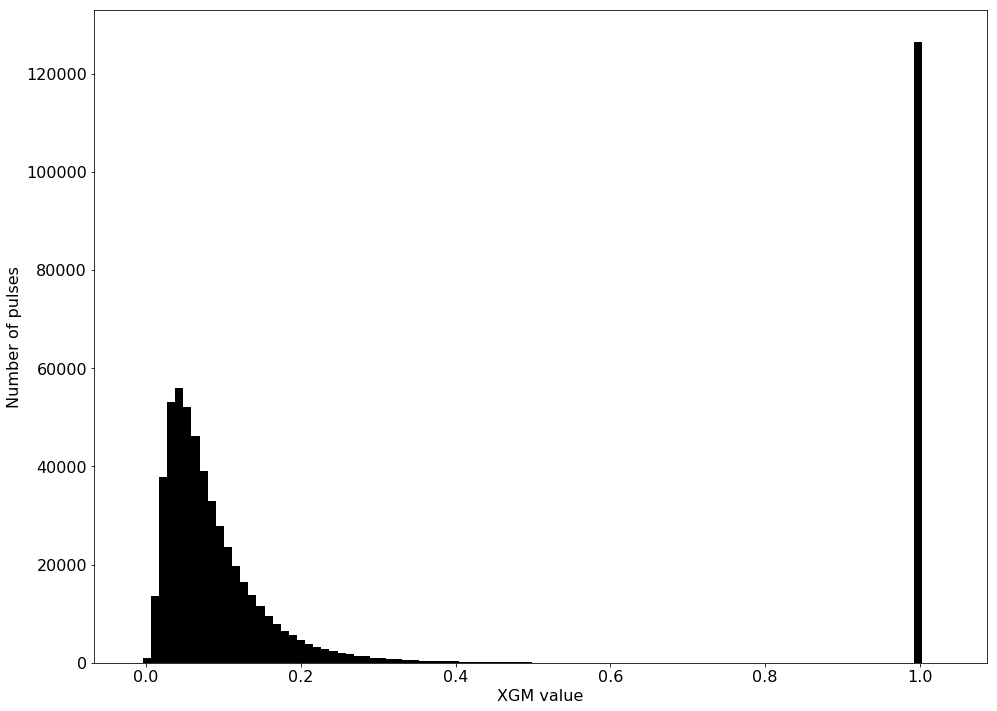

In [6]:
#run_numbers = [12, 13, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 43, 44, 45, 46, 47, 48, 50, 51] 

run_numbers = [98] 
for rn in run_numbers:
    run = ed.RunDirectory(f"/gpfs/exfel/exp/SCS/202002/p002530/raw/r{rn:04d}/")
    xgm_slow = run.get_array("SCS_BLU_XGM/XGM/DOOCS", "pulseEnergy.photonFlux.value")
    xgm_array = run.get_array("SCS_BLU_XGM/XGM/DOOCS:output", "data.intensitySa3TD", extra_dims=["pulse"])
    xgm_mean = xgm_array[:, 0:100].mean(axis=0)
    flat_xgm = xgm_array[:, 0:100].values.ravel()
    plt.hist(flat_xgm, bins=100, color='k')
    plt.xlabel('XGM value')
    plt.ylabel('Number of pulses')
    #plt.savefig(f'./images/XGM/XGM_hist_run{rn}.png', format='png', dpi=300)

# Step1 Import the runs

In [7]:
import processing as pr
import numpy as np

## process the data

### Dark field

In [18]:
proposal = 2530
run = 100
pattern = ['pumped', 'intradark1', 'unpumped', 'intradark2'] * 40
dirname = 'processed_runs_xgm'

In [19]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


In [20]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname='processed_runs_xgm2',
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


### one helicity "positive helicity" 50°

In [21]:
proposal = 2530
run = 98
pattern = ['pumped', 'intradark1', 'unpumped', 'intradark2'] * 40
dirname = 'processed_runs_xgm'

In [22]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


In [23]:
proposal = 2530
run = 98
pattern = ['pumped', 'intradark1', 'unpumped', 'intradark2'] * 40
dark_run = 100
xgm_threshold = (1e-5, np.inf)
dirname = 'processed_runs_xgm'

In [24]:
pr.reduction_norm(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                  dark_run=dark_run, xgm_threshold=xgm_threshold, njobs=40, trains=None,
                  frames={'image': 'pumped', 'dark': 'intradark1'},
                  dark_run_frames={'image': 'pumped', 'dark': 'intradark1'})

Submitted 16 slurm jobs to the queue.


In [25]:
pumped_n = pr.concat_module_images(dirname='processed_runs_xgm',
                                   run=98,
                                   run_type='norm',
                                   image_type='pumped_average')

pumped_n

<xarray.DataArray (frame: 40, module: 16, x: 128, y: 512)>
array([[[[ 5.80381104e+00,  6.34091746e+00,  2.27895318e+00, ...,
          -5.51771138e-02, -9.06919263e-01,  1.65411775e-01],
         [ 6.37288441e+00,  5.93449611e+00,  6.52710596e+00, ...,
           7.87877682e-03, -5.12221824e-01, -4.72456632e-01],
         [ 6.01403584e+00,  8.73611213e+00,  9.53591786e+00, ...,
          -1.37337223e+00, -1.64585445e+00,  8.38208876e-01],
         ...,
         [ 1.49503754e+00,  2.83827222e+00,  1.84256360e+00, ...,
           9.59156402e-02, -3.41405867e-01,  1.20016304e+00],
         [ 4.78295314e+00,  2.27881605e+00,  2.78688230e+00, ...,
           3.70102131e-02,  1.41495124e+00,  1.10834940e+00],
         [ 2.83743342e+00,  1.84851170e+00,  2.92790015e+00, ...,
          -3.63251971e-01, -3.10404789e-01, -4.05152894e-03]],

        [[ 2.58121450e+00,  5.87930308e+00,  2.72415983e+00, ...,
           1.45215045e+00,  1.41921139e+00, -6.59000000e-01],
         [ 6.85190021e+00,  3.19466779e+00,  3.26735383e+00, ...,
           1.21466474e-01, -7.35945807e-01, -5.39118877e-01],
         [ 4.87823542e+00,  3.91174531e+00,  3.59027585e+00, ...,
           3.60076058e-01,  9.32621657e-01,  2.18614386e-01],
...
         [ 1.17494815e-02, -3.06277497e-01, -2.80079752e-01, ...,
          -4.07900494e-01,  9.47234401e-01,  3.93734818e-03],
         [-1.48347676e-01,  4.65551743e-01, -3.37144160e-01, ...,
           4.65094444e-01,  6.04668812e-02,  5.46615621e-01],
         [-1.92379039e-01,  8.32532727e-01,  8.00211283e-01, ...,
           1.90370863e-01, -8.71235494e-02,  1.04321562e-01]],

        [[ 1.78712101e-01, -9.48966646e-01,  7.12663211e-01, ...,
           5.73782524e-02, -2.49912956e-01,  6.88426867e-01],
         [-9.67456327e-02,  8.17499688e-01, -5.20064701e-02, ...,
          -6.88550882e-01, -4.30132934e-01,  3.87323863e-01],
         [-1.43884192e+00, -3.91707808e-01, -4.69912327e-02, ...,
           2.67669275e-01,  6.13797574e-01, -2.85999885e-01],
         ...,
         [-1.48714484e-01,  1.03660974e+00,  1.01806287e+00, ...,
           1.56656554e+00,  6.18708369e-01,  1.35974708e+00],
         [-8.31055104e-01,  7.87466331e-01, -7.98678855e-01, ...,
           2.48691925e-01,  5.59279352e-01,  1.41033840e+00],
         [ 9.50934004e-02,  5.27556427e-01, -1.40632380e+00, ...,
           2.13200695e-01,  3.10589913e-01, -2.04748538e-01]]]])
Coordinates:
  * frame    (frame) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38 39
  * module   (module) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * x        (x) int64 1 2 3 4 5 6 7 8 9 ... 120 121 122 123 124 125 126 127 128
  * y        (y) int64 1 2 3 4 5 6 7 8 9 ... 504 505 506 507 508 509 510 511 512

In [11]:
pr.reduction_norm(proposal=proposal, run=run, pattern=pattern, dirname='processed_runs_xgm2',
                  dark_run=dark_run, xgm_threshold=xgm_threshold, njobs=40, trains=None,
                  frames={'image': 'unpumped', 'dark': 'intradark2'},
                  dark_run_frames={'image': 'unpumped', 'dark': 'intradark2'})

Submitted 16 slurm jobs to the queue.


### other helicity "negative helicity" -130°

In [12]:
proposal = 2530
run = 99
pattern = ['pumped', 'intradark1', 'unpumped', 'intradark2'] * 40
dirname = 'processed_runs_xgm'

In [13]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


In [14]:
proposal = 2530
run = 99
pattern = ['pumped', 'intradark1', 'unpumped', 'intradark2'] * 40
dark_run = 100
xgm_threshold = (1e-5, np.inf)
dirname = 'processed_runs_xgm'

In [15]:
pr.reduction_norm(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                  dark_run=dark_run, xgm_threshold=xgm_threshold, njobs=40, trains=None,
                  frames={'image': 'pumped', 'dark': 'intradark1'},
                  dark_run_frames={'image': 'pumped', 'dark': 'intradark1'})

Submitted 16 slurm jobs to the queue.


In [16]:
pr.reduction_norm(proposal=proposal, run=run, pattern=pattern, dirname='processed_runs_xgm2',
                  dark_run=dark_run, xgm_threshold=xgm_threshold, njobs=40, trains=None,
                  frames={'image': 'unpumped', 'dark': 'intradark2'},
                  dark_run_frames={'image': 'unpumped', 'dark': 'intradark2'})

Submitted 16 slurm jobs to the queue.


## import data

### one helicity "positive helicity" 50°

In [112]:
pumped_std_50 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=98,
                                      run_type='std',
                                      image_type='pumped_average')

In [113]:
intradark1_std_50 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=98,
                                      run_type='std',
                                      image_type='intradark1_average')

In [114]:
unpumped_std_50 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=98,
                                      run_type='std',
                                      image_type='unpumped_average')

In [115]:
intradark2_std_50 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=98,
                                      run_type='std',
                                      image_type='intradark2_average')

In [116]:
pumped_std_130 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=99,
                                      run_type='std',
                                      image_type='pumped_average')

In [117]:
intradark1_std_130 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=99,
                                      run_type='std',
                                      image_type='intradark1_average')

In [118]:
unpumped_std_130 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=99,
                                      run_type='std',
                                      image_type='unpumped_average')

In [119]:
intradark2_std_130 = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=99,
                                      run_type='std',
                                      image_type='intradark2_average')

In [120]:
pumped_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=100,
                                      run_type='std',
                                      image_type='pumped_average')

In [121]:
intradark1_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=100,
                                      run_type='std',
                                      image_type='intradark1_average')

In [122]:
unpumped_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=100,
                                      run_type='std',
                                      image_type='unpumped_average')

In [123]:
intradark2_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=100,
                                      run_type='std',
                                      image_type='intradark2_average')

In [124]:
pumped = np.mean(pumped_std_50, axis=0)
intradarks1 = np.mean(intradark1_std_50, axis=0)
unpumped = np.mean(unpumped_std_50, axis=0)
intradarks2 = np.mean(intradark2_std_50, axis=0)

In [125]:
pumped_2 = np.mean(pumped_std_130, axis=0)
intradarks1_2 = np.mean(intradark1_std_130, axis=0)
unpumped_2 = np.mean(unpumped_std_130, axis=0)
intradarks2_2 = np.mean(intradark2_std_130, axis=0)

In [126]:
dark_pumped = np.mean(pumped_dark, axis=0)
dark_intradarks1 = np.mean(intradark1_dark, axis=0)
dark_unpumped = np.mean(unpumped_dark, axis=0)
dark_intradarks2 = np.mean(intradark2_dark, axis=0)

In [127]:
pumped = ((pumped - (intradarks1+intradarks2)/2) - (dark_pumped - (dark_intradarks1+dark_intradarks2)/2)) 
unpumped = ((unpumped - intradarks2) - (dark_unpumped - dark_intradarks2))

#pumped = (pumped  - dark_pumped ) # (module, v dim, h dim)
#unpumped = (unpumped  - dark_unpumped)

pumped_2 = ((pumped_2 - intradarks1_2) - (dark_pumped - dark_intradarks1))
unpumped_2 = (unpumped_2  - intradarks2_2 - (dark_unpumped - dark_intradarks2))
#pumped_2 = (pumped_2  - dark_pumped ) # (module, v dim, h dim)
#unpumped_2 = (unpumped_2  - dark_unpumped)

In [128]:
pumped.shape

(16, 128, 512)

In [129]:
pumped_n = pr.concat_module_images(dirname='processed_runs_xgm',
                                     run=98,
                                     run_type='norm',
                                     image_type='pumped_average')
unpumped_n = pr.concat_module_images(dirname='processed_runs_xgm2',
                                     run=98,
                                     run_type='norm',
                                     image_type='unpumped_average')

pumped_2_n = pr.concat_module_images(dirname='processed_runs_xgm',
                                     run=99,
                                     run_type='norm',
                                     image_type='pumped_average')
unpumped_2_n = pr.concat_module_images(dirname='processed_runs_xgm2',
                                     run=99,
                                     run_type='norm',
                                     image_type='unpumped_average')


In [130]:
pumped.shape

(16, 128, 512)

# Step3
### start working on actual analysis

Comment: From here on its a manual flight :-). Recurring analytical routines, specific for a certain run, could eventually become part of the DSSCAnalyzer class. Other useful analytical methods will be available under a specific namespace.

In [96]:
#quad_pos = [(-124.100, 3.112),  # TR
#            (-133.068, -110.604),  # BR
#            (0.988, -125.236),  # BL
#            (4.528, -4.912)  # TL
#            ]
#

quad_pos = [(-123.0 , 1.72),  # TR
            (-130.0, -110.18),  # BR
            (1.4, -122.78),  # BL
            (2.2, -4.08)  # TL
            ]

#quad_pos = [(-122.81101449,    4.77217391),
#           (-125.        , -118.24881159),
#           (1.52336232, -119.89306931),
#           (3.49344928,    2.90901765)]

geopath = '/gpfs/exfel/sw/software/git/EXtra-geom/' \
                  'docs/dssc_geo_june19.h5'
#geopath = 'dssc_geom_AS_aug20.h5'
geom = eg.DSSC_1MGeometry.from_h5_file_and_quad_positions(geopath, quad_pos)

#geom = tbdet.load_geom()
#geom.inspect()

#Some ASICS (squares) are broken and can be manually masked away if desired

masklist = [
    (4, 1, 0),
    (13, 0, 0),
    (1, 0, 6),
]
dssc_mask = tbdet.quickmask_DSSC_ASIC(geom, masklist)

In [97]:
dssc_mask.shape

(1177, 1073)

In [98]:
px_x = 204 #um
px_y = 236
#px_nb = 1024
en = 707.6 #eV
ld = 1239.97/en #nm


D = 4600
q_x_XFEL = 2*np.pi/ld/D*px_x/1000
q_y_XFEL = 2*np.pi/ld/D*px_y/1000

q_x_XFEL2 = (4*np.pi/ld)*np.sin(0.5*np.arctan(1e-3*px_x/D))
q_y_XFEL2 = (4*np.pi/ld)*np.sin(0.5*np.arctan(1e-3*px_y/D))

extent_XFEL = [-q_x_XFEL*int(dssc_mask.shape[0]/2), q_x_XFEL*int(dssc_mask.shape[0]/2), -q_y_XFEL*int(dssc_mask.shape[1]/2), q_y_XFEL*int(dssc_mask.shape[1]/2)]


In [99]:
#Assemble the modules to one image. This has not yet been corrected hexagonal to carthesian
pumped, center = geom.position_modules_fast(pumped)
unpumped, center = geom.position_modules_fast(unpumped)

pumped2, center = geom.position_modules_fast(pumped_2)
unpumped2, center = geom.position_modules_fast(unpumped_2)
#image2, center = geom.position_modules_fast(images2)

#image = (images_assembled)[::-1,::-1]

In [100]:
print(np.nansum(pumped))
print(np.nansum(unpumped))

8522.394640423357
8846.335594252376


In [101]:
np.nanmax(pumped/np.nansum(pumped)-unpumped/np.nansum(unpumped))

0.0004712993173433724

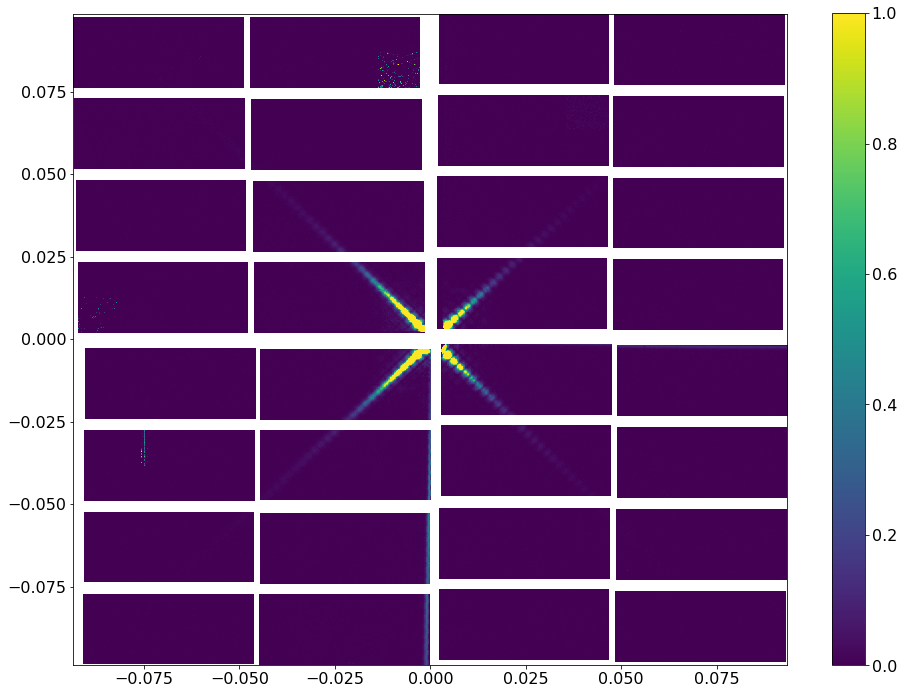

In [102]:
#plt.imshow((dssc_mask * images_assembled[0,:,:])[::-1,::-1],vmin=0.1, vmax=1.0)
#plt.imshow(np.log((dssc_mask * images_assembled[0,:,:])[::-1,::-1]),vmin=-10, vmax=5,aspect=204.0/236.0)
#plt.figure(figsize=(12,9))
plt.imshow(pumped, vmin=0, vmax=1, 
           aspect=204.0/236.0,
           extent = extent_XFEL)
plt.colorbar()
#plt.xlim(300, 800)
#plt.ylim(300, 800)
#plt.savefig(f'./images/curved_grating/run_66_2.png' , format='png', dpi=300)

(1177, 1073)

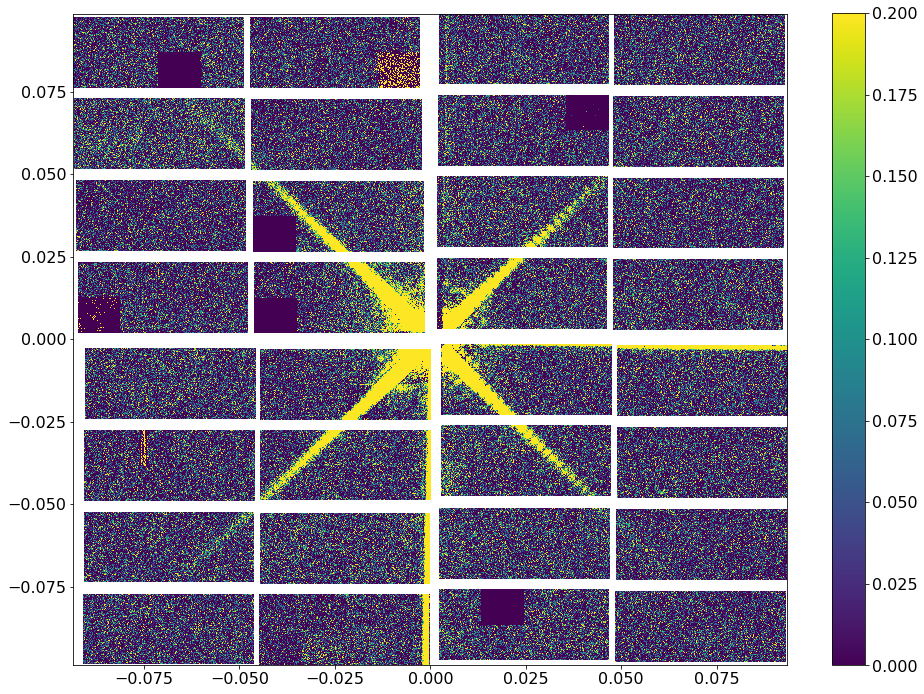

In [139]:
image1, center = geom.position_modules_fast(np.mean(pumped_n, axis=0))
image2, center = geom.position_modules_fast(np.mean(pumped_2_n, axis=0))

plt.imshow(image1, vmin=0, vmax=0.2, 
           aspect=204.0/236.0,
           extent = extent_XFEL)
plt.colorbar()

image.shape

In [104]:
np.nanmax((pumped2/np.nansum(pumped2)-unpumped2/np.nansum(unpumped2)))

0.000371384308133568

TypeError: Invalid dimensions for image data

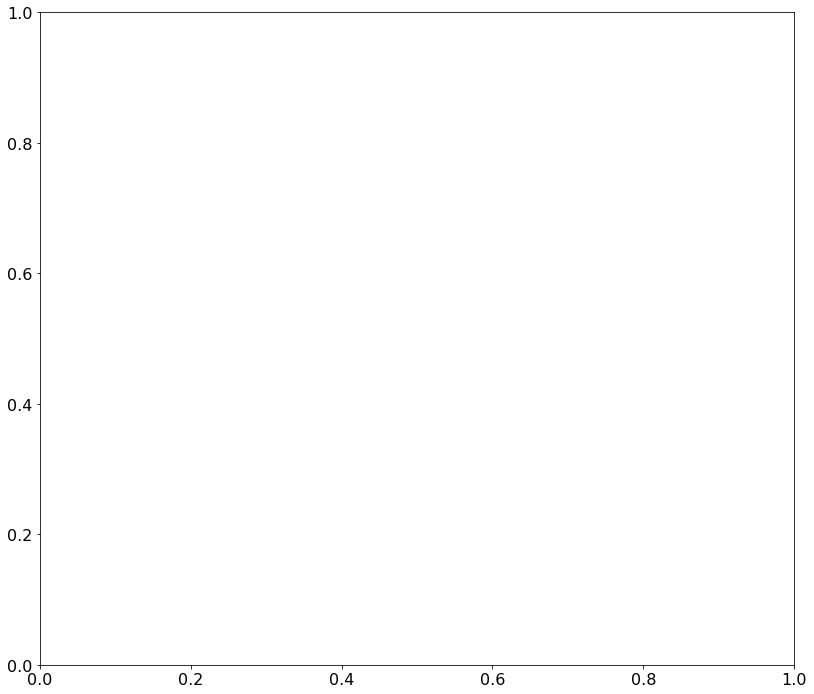

In [105]:
#plt.imshow((dssc_mask * images_assembled[0,:,:])[::-1,::-1],vmin=0.1, vmax=1.0)
#plt.imshow(np.log((dssc_mask * images_assembled[0,:,:])[::-1,::-1]),vmin=-10, vmax=5,aspect=204.0/236.0)
#plt.figure(figsize=(8,8))
plt.imshow(unpumped_n, vmin=0, vmax=1, 
           aspect=204.0/236.0,
           extent = extent_XFEL)
plt.colorbar()
#plt.xlim(400, 700)
#plt.ylim(450, 800)
#plt.savefig(f'NegHel_G7_706.2eV.png' , format='png', dpi=300)


In [106]:
pumped.shape

(1177, 1073)

# XMCD

In [61]:
print(np.nansum(image))

print(np.nansum(image2))


NameError: name 'image' is not defined

In [62]:
xmcd = (image*1e6 - image2*1e6)
charge = (image*1e6 + image2*1e6)

NameError: name 'image' is not defined

In [63]:
print(np.nanmax(xmcd))
print(np.nanmean(xmcd))
print(np.nanmin(xmcd))


print(np.nanmax(charge))
print(np.nanmean(charge))
print(np.nanmin(charge))

print(np.nanmax(xmcd/charge))
print(np.nanmean(xmcd/charge))
print(np.nanmin(xmcd/charge))

NameError: name 'xmcd' is not defined

In [64]:
print(np.nanmax(xmcd))

NameError: name 'xmcd' is not defined

In [ ]:
int(image.shape[1]/2)-311

In [ ]:
np.savetxt('XFEL_G7_pumped-unpumped.dat', (xmcd-xmcd_unpumped)[244:940, 221:843])

In [ ]:
np.nanmax(xmcd_unpumped)

In [ ]:
print(np.nanmax(xmcd))
print(np.nanmax(xmcd_unpumped))

Text(0.5, 1.0, 'XMCD (98 - 99) pumped-unpumped')

<Figure size 576x576 with 0 Axes>

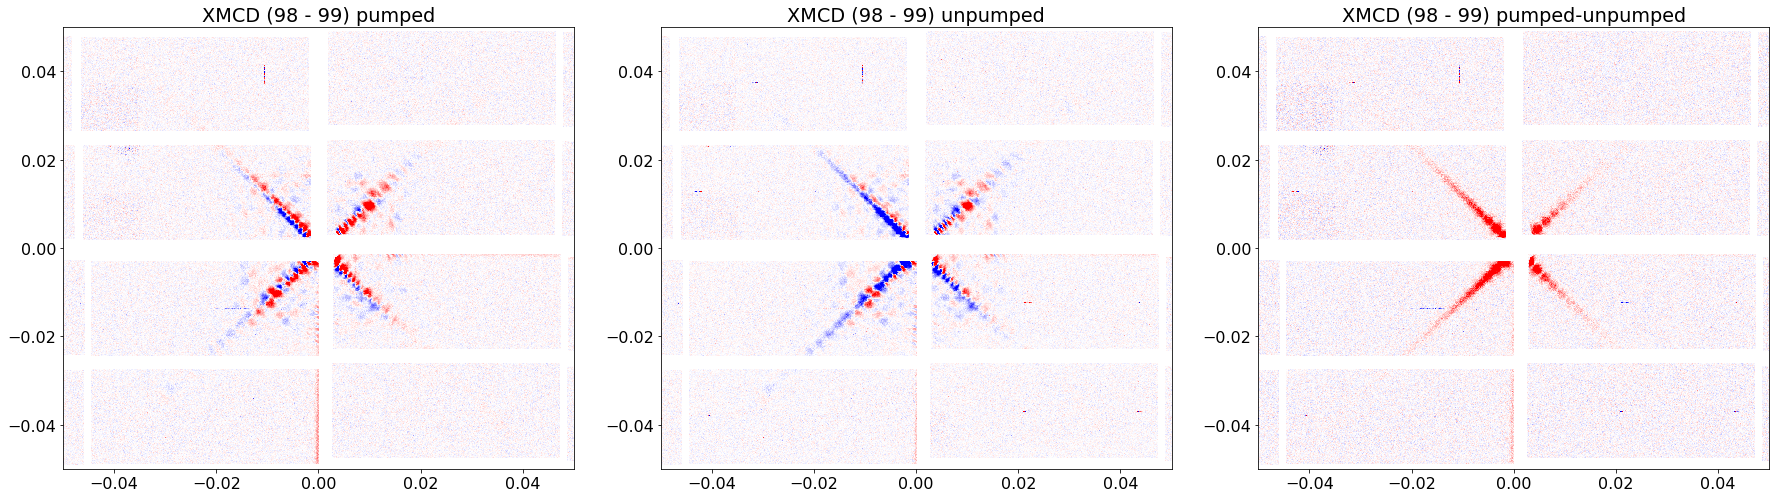

In [156]:
#plt.imshow((dssc_mask * images_assembled[0,:,:])[::-1,::-1],vmin=0.1, vmax=1.0)
#plt.imshow(np.log((dssc_mask * images_assembled[0,:,:])[::-1,::-1]),vmin=-10, vmax=5,aspect=204.0/236.0)
plt.figure(figsize=(8,8))
xmcd = ((pumped/np.nansum(pumped))-(pumped2/np.nansum(pumped2)))#/((pumped/np.nansum(pumped))+(pumped2/np.nansum(pumped2)))
xmcd_unpumped = ((unpumped/np.nansum(unpumped))-(unpumped2/np.nansum(unpumped2)))#/((unpumped/np.nansum(unpumped))+(unpumped2/np.nansum(unpumped2)))
#xmcd = image - image2  

vmax = 7e-6
plt.figure(figsize=(25, 10))
plt.subplot(1,3,1)
plt.imshow((xmcd), vmin=-vmax, vmax=vmax, 
           aspect=204.0/236.0, cmap='bwr',
           extent = extent_XFEL)

#plt.colorbar()
plt.tight_layout()
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.title(f'XMCD ({98} - {99}) pumped')#-({run_nr} + {run_nr2})')

plt.subplot(1,3,2)
plt.imshow((xmcd_unpumped), vmin=-vmax, vmax=vmax, 
           aspect=204.0/236.0, cmap='bwr',
           extent = extent_XFEL)

#plt.colorbar()
plt.tight_layout()
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.title(f'XMCD ({98} - {99}) unpumped')#-({run_nr} + {run_nr2})')

plt.subplot(1,3,3)
plt.imshow(xmcd-xmcd_unpumped, vmin=-vmax, vmax=vmax, 
           aspect=204.0/236.0, cmap='bwr',
           extent = extent_XFEL)

#plt.colorbar()
plt.tight_layout()
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.title(f'XMCD ({98} - {99}) pumped-unpumped')#-({run_nr} + {run_nr2})')

#plt.savefig('run_16-15.tiff')


#plt.savefig(f'./images/xmcd_{run_nr}_{run_nr2}_by_counts.png' , format='png', dpi=300)
#np.savetxt('run_16+15.dat', (image + image2) )
#np.savetxt('run_50.dat',images_2 )

In [ ]:
#plt.imshow((dssc_mask * images_assembled[0,:,:])[::-1,::-1],vmin=0.1, vmax=1.0)
#plt.imshow(np.log((dssc_mask * images_assembled[0,:,:])[::-1,::-1]),vmin=-10, vmax=5,aspect=204.0/236.0)
plt.figure(figsize=(8,8))
xmcd_unpumped = unpumped-unpumped2
#xmcd = image - image2  

vmax = 0.05
plt.imshow(xmcd_unpumped, vmin=-vmax, vmax=vmax, 
           aspect=204.0/236.0, cmap='bwr',
           extent = extent_XFEL)

#plt.colorbar()
plt.tight_layout()
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.title(f'XMCD ({run_nr} - {run_nr2}) unpumped')#-({run_nr} + {run_nr2})')

#plt.savefig('run_16-15.tiff')


#plt.savefig(f'./images/xmcd_{run_nr}_{run_nr2}_by_counts.png' , format='png', dpi=300)
#np.savetxt('run_16+15.dat', (image + image2) )
#np.savetxt('run_50.dat',images_2 )

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.imshow(xmcd , cmap='bwr',  vmin=-1e4, vmax=1e4, 
           extent = [-q_x_XFEL*int(image.shape[0]/2), q_x_XFEL*int(image.shape[0]/2), -q_y_XFEL*int(image.shape[1]/2), q_y_XFEL*int(image.shape[1]/2)])
plt.title('CL-CR')
#plt.xlim(66,1740)
#plt.ylim(374,2048)
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(charge , cmap='viridis', vmin=0, vmax=1e5, 
           extent = [-q_x_XFEL*int(image.shape[0]/2), q_x_XFEL*int(image.shape[0]/2), -q_y_XFEL*int(image.shape[1]/2), q_y_XFEL*int(image.shape[1]/2)])
plt.title('CL+CR')
#plt.xlim(66,1740)
#plt.ylim(374,2048)
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow((image*1e6-image2*1e6)/(image*1e6+image2*1e6), cmap='bwr', vmin=-1e1, vmax=1e1, 
           extent = [-q_x_XFEL*int(image.shape[0]/2), q_x_XFEL*int(image.shape[0]/2), -q_y_XFEL*int(image.shape[1]/2), q_y_XFEL*int(image.shape[1]/2)])
plt.title('(CL-CR)/(CL+CR)')
#plt.xlim(66,1740)
#plt.ylim(374,2048)
plt.colorbar()
plt.tight_layout()
plt.savefig('test.tiff')
#plt.savefig(f'./images/runs16_15.png' , format='png', dpi=300)

In [ ]:
from scipy import ndimage, misc

img = np.nan_to_num(xmcd)

img_rot = ndimage.rotate(img, 1, reshape=False)


fig = plt.figure(figsize=(10, 15))

ax1, ax2 = fig.subplots(1, 2)

ax1.imshow(xmcd,vmin=-vmax, vmax=vmax, aspect=204.0/236.0, cmap='bwr',
           extent = [-q_x_XFEL*int(image.shape[0]/2), q_x_XFEL*int(image.shape[0]/2), -q_y_XFEL*int(image.shape[1]/2), q_y_XFEL*int(image.shape[1]/2)])

ax2.imshow(img_rot,vmin=-vmax, vmax=vmax, aspect=204.0/236.0, cmap='bwr',
           extent = [-q_x_XFEL*int(image.shape[0]/2), q_x_XFEL*int(image.shape[0]/2), -q_y_XFEL*int(image.shape[1]/2), q_y_XFEL*int(image.shape[1]/2)])




In [ ]:
img_45

# Reconstruction of image in real space


In [ ]:
import numpy.fft as fft

In [ ]:
#only use for the HERALDO samples (masks with slits)
x = np.linspace(-1,1,image.shape[0])
x = np.expand_dims(x, axis=0)
y = np.linspace(-1, 1,image.shape[1])
y = np.expand_dims(y, axis=0)
filtre = np.dot(x.T, y)

heraldo = filtre * img_rot #image

In [ ]:
reconstruct = fft.ifftshift(fft.ifft2(fft.fftshift(np.nan_to_num(image))))

In [ ]:
print(np.nanmax(np.abs(reconstruct)))
print(np.nanmean(np.abs(reconstruct)))
print(np.nanmin(np.abs(reconstruct)))

In [ ]:
vmax=5e-4
plt.imshow(np.real(reconstruct), vmin=-vmax, vmax= vmax ,aspect=204.0/236.0, cmap='gray')
plt.colorbar()